In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xpos=np.random.uniform(0,20,100)
ypos=np.random.uniform(0,20,100)
zpos=np.random.uniform(0,20,100)

Aca definimos los parámetros de la mesh

Para este caso, tenemos que las longitudes en las que se encuentran las partículas  son $L_x=20$, $L_y=20$, $L_z=20$ ya que $|-10-10|=20$

Vamos a tomar las longitudes de los largos de las celdas como:
$\Delta x= \frac{L_x}{N_{g_x}}$,
$\Delta y= \frac{L_y}{N_{g_y}}$,
$\Delta z= \frac{L_z}{N_{g_z}}$

In [3]:
Lx=20.0
Ly=20.0
Lz=20.0
N=20

In [4]:
Deltax=(Lx/N)
Deltay=(Ly/N)
Deltaz=(Lz/N)

Para calcular la densidad, primero necesitamos un arreglo de tamaño  $N_{gx}\times N_{gy}\times N_{gz}$, para nuestro caso es $N^3$. Definamos esa variable:

In [5]:
den3D=np.zeros((N,N,N))

La función forma de la partícula en este caso es un paralelepipedo rectangular  de volume, $\Delta x \Delta y \Delta z$. En este esquema se involucran las ocho celdas más cercanas para cada partícula. Este esquema es conocido como Cloud-in-Cell (CiC).

Consideremos, el esquema de asignación CiC para una partícula con coordenadas $(x_p,y_p,z_p)$. La celda que contiene 
la partícula tiene índices dados por: $i=floor(x_p/\Delta x)$, $j=floor(y_p/\Delta y)$, $k=floor(z_p/\Delta z)$

Definamos una función que nos retorne estos valores:

In [6]:
def inx(xp,Dx):
    i=int(math.floor(xp/Dx))
    return i

In [7]:
def iny(yp,Dy):
    j=int(math.floor(yp/Dy))
    return j

In [8]:
def inz(zp,Dz):
    k=int(math.floor(zp/Dz))
    return k

Debemos considerar el centro de la celda el cuál va estar definido por $(x_c,y_c,z_c)=(i\Delta x, j \Delta y, k\Delta z)$

In [9]:
def CCx(xp,Dx):
    xc=inx(xp,Dx)*Dx
    return xc

In [10]:
def CCy(yp,Dy):
    yc=iny(yp,Dy)*Dy
    return yc

In [11]:
def CCz(zp,Dz):
    zc=iny(zp,Dz)*Dz
    return zc

La densisdad contribuye a la celda principal y a siete celdas vecinas indexadas por $(i,j,k), (ii,j,k),(i,jj,k),(i,j,kk),(ii,jj,k),(ii,j,kk),(i,jj,kk)$ y $(ii,jj,kk)$

Donde los índices $ii$,$jj$ y $kk$ están definidos por: $ii=mod(i+1, N_{gx})$,$jj=mod(j+1, N_{gy})$ y 
$kk=mod(k+1, N_{gz})$

In [12]:
def inxx(xp,Dx,Nx):
    ii=int((inx(xp,Dx)+1)%Nx)
    return ii

In [13]:
def inyy(yp,Dy,Ny):
    jj=int((iny(yp,Dy)+1)%Ny)
    return jj

In [14]:
def inzz(zp,Dz,Nz):
    kk=int((inz(zp,Dz)+1)%Nz)
    return kk

In [15]:
inzz(1.2,1,20)

2

Definamos ahora las cantidades $dx=\frac{x_p}{\Delta x}-i$, $dy=\frac{y_p}{\Delta y}-j$, $dz=\frac{z_p}{\Delta z}-k$

y $t_x=1-dx$, $t_y=1-dy$, $t_z=1-dz$

In [16]:
def delx(xp,Dx):
    dx=(xp/Dx)-inx(xp,Dx)
    return dx

In [17]:
def dely(yp,Dy):
    dy=(yp/Dy)-iny(yp,Dy)
    return dy

In [18]:
def delz(zp,Dz):
    dz=(zp/Dz)-inz(zp,Dz)
    return dz

In [19]:
def ti(xp,Dx):
    tx=1-delx(xp,Dx)
    return tx

In [20]:
def tj(yp,Dy):
    ty=1-dely(yp,Dy)
    return ty

In [21]:
def tk(zp,Dz):
    tz=1-delz(zp,Dz)
    return tz

Las contribuciones a las ocho celdas están dadas por $W(\vec{x_P}-x_{i,j,k})=t_x t_y t_z$

$W(\vec{x_P}-x_{ii,j,k})=d_x t_y t_z$

$W(\vec{x_P}-x_{i,jj,k})=t_x d_y t_z$

$W(\vec{x_P}-x_{i,j,kk})=t_x t_y d_z$

$W(\vec{x_P}-x_{ii,jj,k})=d_x d_y t_z$

$W(\vec{x_P}-x_{ii,j,kk})=d_x t_y d_z$

$W(\vec{x_P}-x_{i,jj,kk})=t_x d_y d_z$


$W(\vec{x_P}-x_{ii,jj,kk})=d_x d_y d_z$

Sumando sobre todas las partículas resulta en el calculo de $\rho$ en la grid. Pregunta: Sabemos que $\rho(x_c)=Cons\sum_{i}^{N_p}W(\vec{x_i}-\vec{x_{ijk}})$

En el anterior código lo hacía $\rho(x_c)=C\sum_n W(x_n-x_i)W(y_n-y_j)W(z_n-z_k)$

In [22]:
def rho3D(xp,yp,zp,Dx,Dy,Dz,Nx,Ny,Nz,den3D):
    i=int(inx(xp,Dx))
    j=int(iny(yp,Dy))
    k=int(inz(yp,Dz))
    ii=inxx(xp,Dx,Nx)
    jj=inyy(yp,Dy,Ny)
    kk=inyy(zp,Dz,Nz)
    den3D[i,j,k]=den3D[i,j,k]+(ti(xp,Dx)*tj(yp,Dy)*tk(zp,Dz))
    den3D[ii,j,k]=den3D[ii,j,k]+(delx(xp,Dx)*tj(yp,Dy)*tk(zp,Dz))
    den3D[i,jj,k]=den3D[i,jj,k]+(ti(xp,Dx)*dely(yp,Dy)*tk(zp,Dz))
    den3D[i,j,kk]=den3D[i,j,kk]+(ti(xp,Dx)*tj(yp,Dy)*delz(zp,Dz))
    den3D[ii,jj,k]=den3D[ii,jj,k]+(delx(xp,Dx)*dely(yp,Dy)*tk(zp,Dz))
    den3D[ii,j,kk]=den3D[ii,j,kk]+(delx(xp,Dx)*tj(yp,Dy)*delz(zp,Dz))
    den3D[i,jj,kk]=den3D[i,jj,kk]+(ti(xp,Dx)*dely(yp,Dy)*delz(zp,Dz))
    den3D[ii,jj,kk]=den3D[ii,jj,kk]+(delx(xp,Dx)*dely(yp,Dy)*delz(zp,Dz))


In [23]:
def suma(x,y,z,Dx,Dy,Dz,Nx,Ny,Nz,Np):
    den3d=np.zeros((Nx,Ny,Nz))
    for i in range(0,Np):
        xp=x[i]
        yp=y[i]
        zp=z[i]
        rho3D(xp,yp,zp,Dx,Dy,Dz,Nx,Ny,Nz,den3d)
    return den3d

In [24]:
x=np.random.uniform(0,20,100000)
y=np.random.uniform(0,20,100000)
z=np.random.uniform(0,20,100000)

In [25]:
sum(suma(x,y,z,Deltax,Deltay,Deltaz,20,20,20,len(x)).flatten())

100000.00000000045

In [26]:
Den3D=suma(x,y,z,Deltax,Deltay,Deltaz,20,20,20,len(x))

In [27]:
Den3D.shape

(20, 20, 20)

Ya calculamos la densidad de masa de un Snapshot obtenida de una simulación de N cuerpos 
usando el esquema de Cloud-in-Cell.

Recordemos que si tenemos la densidad de masa $\rho(x)$, podemos realizar la transformada de Fourier y 
obtener 

$ \rho(k)=1/(2\pi)^3 \int \rho(x) \exp(-ik.x)d^3x $

Pregunta, para calcular el espectro de potencias, lo que debemos calcular primero es 

$\delta(x)=\frac{\rho(x)-\bar{\rho}}{\bar{\rho}}$

y luego realizar la transformada de Fourier: $ \delta(k)=\frac{1}{(2\pi)^3} \int \delta(x) \exp(-ik.x)d^3x $

Una vez tenemos $\delta(k)$, nuestro espectro de potencias lo calculamos como $p(k)=\left<{ |\delta(k)|^2 }\right>$

En este caso, como tenemos un espacio discreto, debemos utilizar la transformada discreta de Fourier


In [28]:
from nbodykit.lab import *
%config InlineBackend.figure_format = 'retina'
from nbodykit import setup_logging, style
plt.style.use(style.notebook)

/Users/diegobarbosa/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [29]:
from nbodykit.lab import ArrayMesh
data = np.random.random(size=(128,128,128))

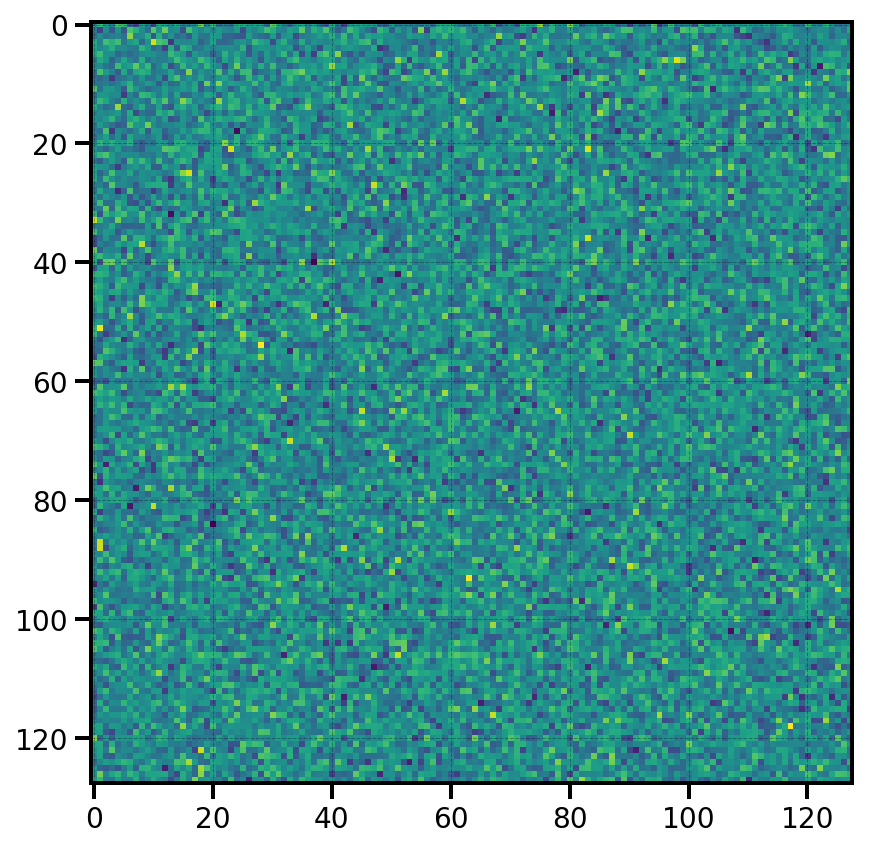

In [30]:
mesh = ArrayMesh(data,BoxSize=1.0)
plt.imshow(mesh.preview(axes=[0,1]))

Vamos a observar el espectro de potencias para la densidad en una mesh de $128^3$

In [31]:
import math 
import h5py
f=h5py.File('density.h5')
f.keys()
dset=f['density']
dens=np.array(dset)

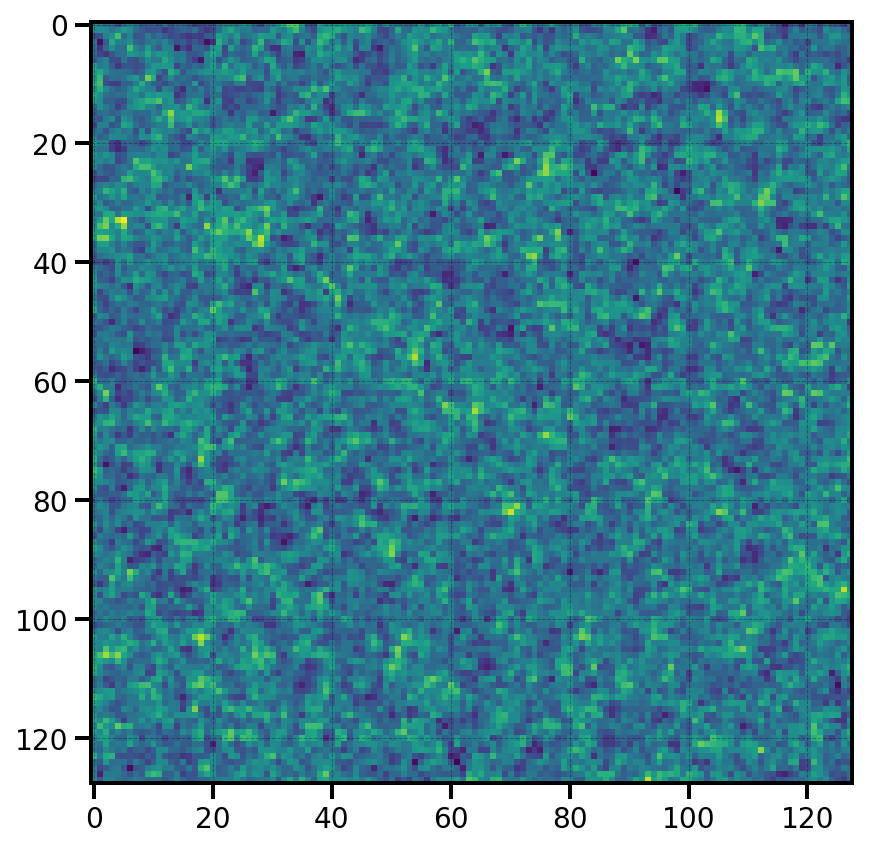

In [32]:
mesh = ArrayMesh(dens,BoxSize=2000)
real=mesh.paint(mode='real', Nmesh=128)
plt.imshow(real.preview(axes=[0,1]))
plt.savefig('dens128x128.png')

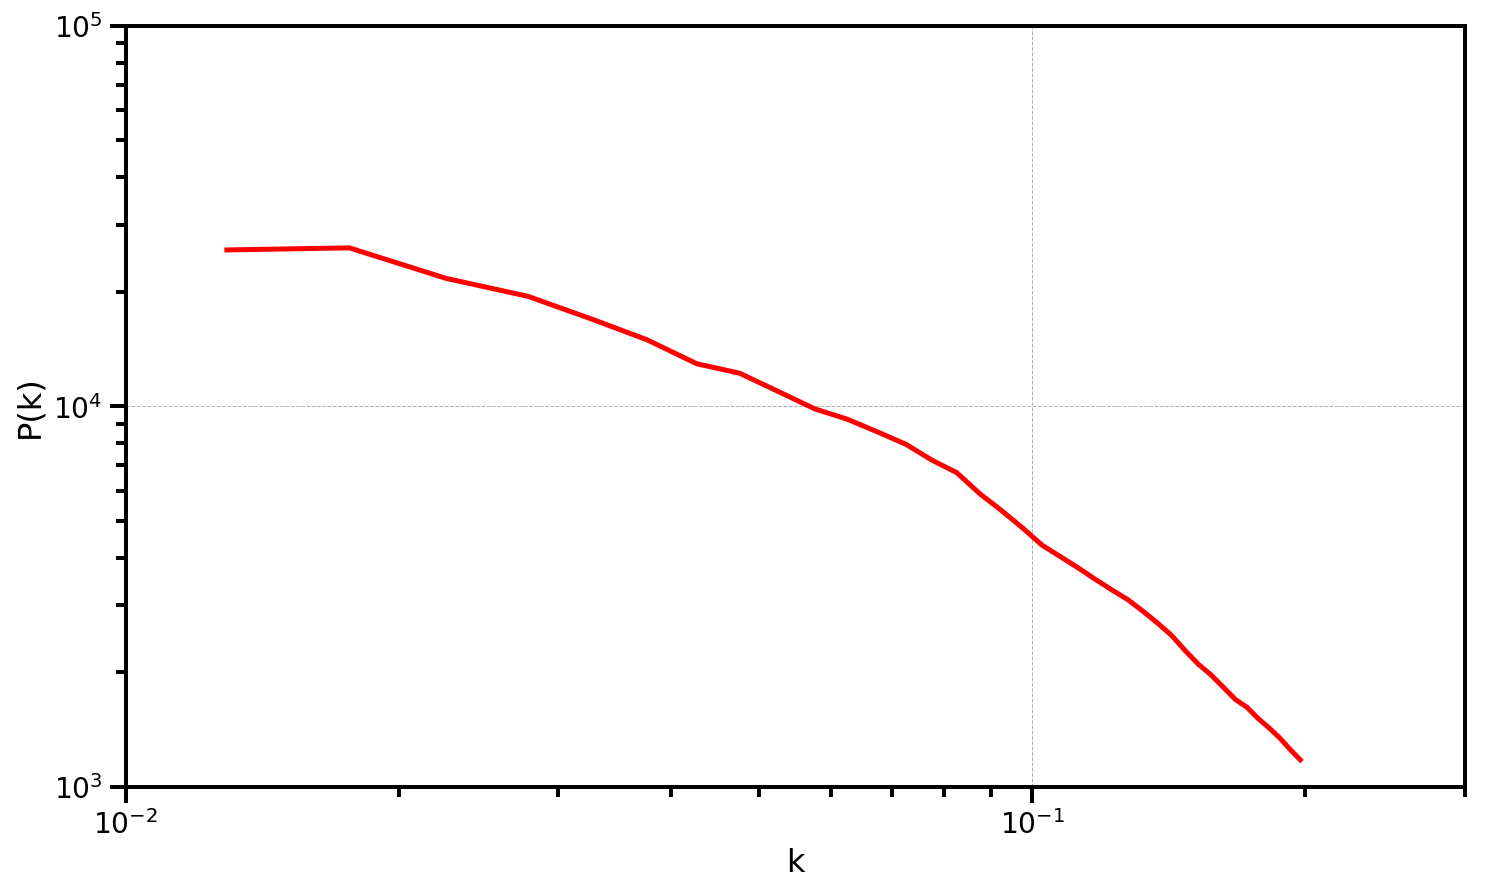

In [33]:
r1 = FFTPower(real, mode='1d', dk=0.005, kmin=0.01)
Pk1 = r1.power
plt.loglog(Pk1['k'], Pk1['power'].real,'r-')
plt.xlabel(r"k")
plt.ylabel(r"P(k)")
plt.ylim(1e3, 1e5)
plt.xlim(1e-2,0.3)
plt.savefig('power.png')